In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch
from scipy import signal
import neurokit2 as nk


# 1. Inicialiações e analises iniciais dos sinais

In [4]:
df = pd.read_csv('C:\\Users\\doxda\\OneDrive\\Documentos\\Repositorios\\master-degree-ufsc-electrical-engineering\\PSB\\T2\\data\\ECG_XYZ.csv')

fs = 1000
dur = 299.111 # ~ 5 mins
N = int(fs * dur)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299111 entries, 0 to 299110
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SamplingInterval        299111 non-null  float64
 1   RefChXGain1000Inverted  299111 non-null  float64
 2   ChXGain5000             299111 non-null  float64
 3   ChYGain5000             299111 non-null  float64
 4   ChZGain5000             299111 non-null  float64
dtypes: float64(5)
memory usage: 11.4 MB


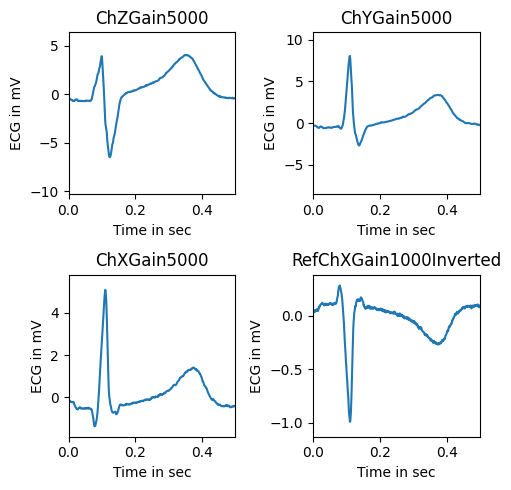

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
cols = ['RefChXGain1000Inverted', 'ChXGain5000','ChYGain5000', 'ChZGain5000']
for row in range(0, 2):
    for col in range(0, 2):
        sig = cols.pop()
        t =  df['SamplingInterval'].to_numpy()
        ecg = df[sig].to_numpy()
        axs[row, col].plot(t, ecg)
        axs[row, col].set_title(sig)
        axs[row, col].set_xlim([0, 0.5])
        axs[row, col].set_xlabel("Time in sec")
        axs[row, col].set_ylabel("ECG in mV")
plt.tight_layout()

# 2. Densidade espectral

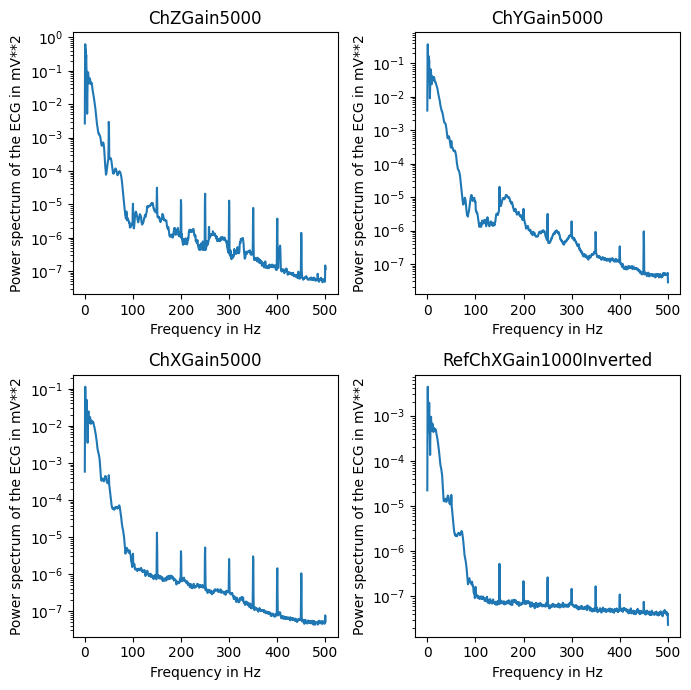

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
cols = ['RefChXGain1000Inverted', 'ChXGain5000','ChYGain5000', 'ChZGain5000']
for row in range(0, 2):
    for col in range(0, 2):
        sig = cols.pop()
        ecg = df[sig].to_numpy()
        f, Pxx = welch(ecg, fs=fs, nperseg=2048, scaling="spectrum")
        axs[row, col].semilogy(f, Pxx)
        axs[row, col].set_title(sig)
        axs[row, col].set_xlabel("Frequency in Hz")
        axs[row, col].set_ylabel("Power spectrum of the ECG in mV**2")
plt.tight_layout()

# 3. Exercicio

## 3.1. A

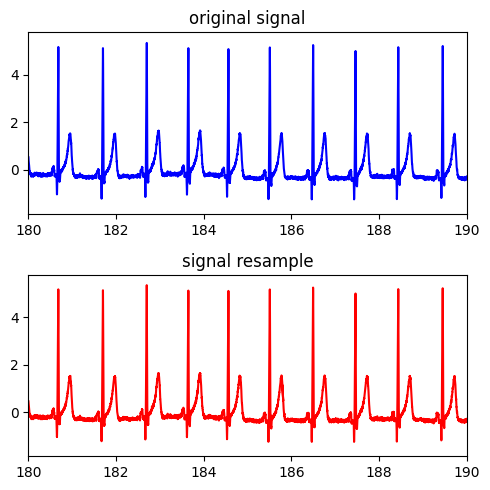

In [7]:
x = df['SamplingInterval'].to_numpy()
y = df['ChXGain5000'].to_numpy()
yre = signal.resample(df['ChXGain5000'].to_numpy(), 1196444)
xre = np.linspace(0, 299.0775, len(yre), endpoint=False)

df_re = pd.DataFrame()
df_re['SamplingInterval'] = xre
df_re['ChXGain5000'] = yre


fig, axs = plt.subplots(2, figsize=(5, 5))


axs[0].plot(x,y,'b')
axs[0].set_title('original signal')
axs[0].set_xlim([180, 190])

axs[1].plot(xre,yre,'r')
axs[1].set_title('signal resample')
axs[1].set_xlim([180, 190])

plt.tight_layout()

In [8]:
df_re.tail()

,SamplingInterval,ChXGain5000
1196439,299.07625,-0.373106
1196440,299.07650,-0.352000
1196441,299.07675,-0.311083
1196442,299.07700,-0.257269
1196443,299.07725,-0.202405


## 3.2. B

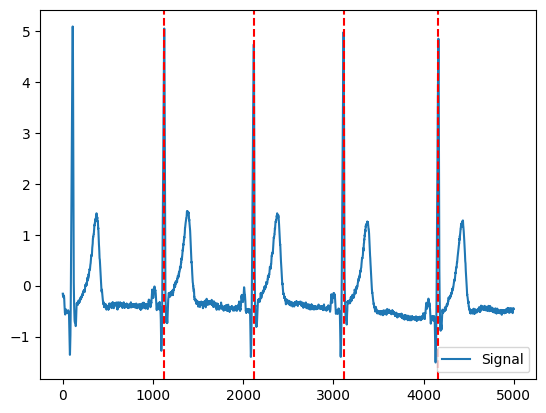

In [31]:
ecg_signal = df['ChXGain5000'].to_numpy()
ecg_signal = ecg_signal[0:5000]
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:6000])

In [32]:
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="peak")

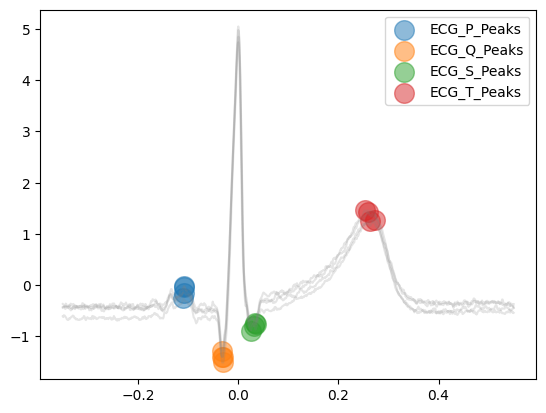

In [34]:
_, waves_peak = nk.ecg_delineate(ecg_signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')